Start with the following two lines to import tensorflow and MNIST dataset under the Keras API.

In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Visualise and check data samples with MatPLotLib

8


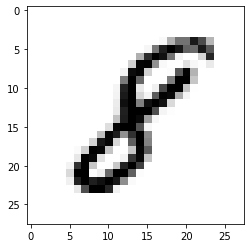

In [4]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

Get shape of dataset

In [6]:
x_train.shape

(60000, 28, 28)

## Reshape and normalise

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Building the Convolutional Neural Network

In [10]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

## Compiling and Fitting the Model

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=2) #epochs=10

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 25s 421us/sample - loss: 0.0683 - accuracy: 0.9790
Epoch 2/2
60000/60000 [==============================] - 25s 424us/sample - loss: 0.0474 - accuracy: 0.9849


## Evaluating the Model
Finally, you can evaluate the trained model with x_test and y_test:

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 162us/sample - loss: 0.0580 - accuracy: 0.9824


[0.058013553178950676, 0.9824]